In [1]:
### SQL like tasks, joins

In [2]:
### Idea joins: (SQL)
# Inner, outer, left and right
# concatenate tables

In [3]:
import pandas as pd

In [4]:
path="/Users/gunnvantsaini/Store.csv"

In [5]:
data=pd.read_csv(path)

In [6]:
data.head(2)

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,0,1,CA-2013-152156,11/9/2013,11/12/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,1,2,CA-2013-152156,11/9/2013,11/12/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [7]:
print(dir(data))

['Category', 'City', 'Country', 'Discount', 'Profit', 'Quantity', 'Region', 'Sales', 'Segment', 'State', 'T', '_AXIS_ALIASES', '_AXIS_IALIASES', '_AXIS_LEN', '_AXIS_NAMES', '_AXIS_NUMBERS', '_AXIS_ORDERS', '_AXIS_REVERSED', '_AXIS_SLICEMAP', '__abs__', '__add__', '__and__', '__array__', '__array_priority__', '__array_wrap__', '__bool__', '__bytes__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__div__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '_

In [32]:
table1=pd.DataFrame({'Cust_Id':[1,2,3,4,5,6],'Name':['A','B','C','D','E','F']})

In [33]:
table2=pd.DataFrame({'Cust_Id':[2,4,6],'Paid':['Y','N',"Y"]})

In [34]:
table1

,Cust_Id,Name
0,1,A
1,2,B
2,3,C
3,4,D
4,5,E
5,6,F


In [35]:
table2

,Cust_Id,Paid
0,2,Y
1,4,N
2,6,Y


In [20]:
# table1.join(table2,on="Cust_Id",how="inner",rsuffix="other")

In [39]:
pd.merge(table1,table2,on="Cust_Id",how="inner")

,Cust_Id,Name,Paid
0,2,B,Y
1,4,D,N
2,6,F,Y


In [25]:
d=pd.merge(table1,table2,on="Cust_Id",how="outer")

In [26]:
d

,Cust_Id,Name,Paid
0,1,A,NaN
1,2,B,Y
2,3,C,NaN
3,4,D,N
4,5,E,NaN
5,6,F,Y


In [27]:
## Find where you have missing values
d.isnull().sum()

Cust_Id    0
Name       0
Paid       3
dtype: int64

In [28]:
## Replace the nulls with something
d['Paid'].fillna("Y")

0    Y
1    Y
2    Y
3    N
4    Y
5    Y
Name: Paid, dtype: object

In [40]:
#### How many missing values I have
## 2 missing values aren't many (~2%)
## Remove those rows, 2% 
## ~10 to 15%, may not want to remove
## Fill them up
# numeric fill with its mean or median
# categorical, fill with the most frequent value
# >50%, drop the column

In [42]:
###
path="/Users/gunnvantsaini/Data/Work/Python Trainings/PythonForModellers/Data/Strings.csv"

In [43]:
st=pd.read_csv(path)

In [44]:
st.head()

,Age,Income_M,Expenses
0,10,Rs 12000/-,"8,000"
1,30,Rs 45000/-,"21,000"
2,34,Rs 39000/-,"20,000"
3,16,Rs 6000/-,"2,000"
4,19,Rs 20000/-,"10,000"


In [46]:
### Can I find the mean of Income_M col?
st.dtypes

Age          int64
Income_M    object
Expenses    object
dtype: object

In [49]:
def cleaner(x):
    return x.replace("Rs","").replace("/-","")

In [51]:
st['Income_M']=st['Income_M'].map(cleaner)

In [54]:
st.dtypes

Age          int64
Income_M    object
Expenses    object
dtype: object

In [55]:
st['Income_M']=st['Income_M'].astype("float")

In [56]:
st.dtypes

Age           int64
Income_M    float64
Expenses     object
dtype: object

In [57]:
st['Income_M'].mean()

36600.0

In [59]:
st['Expenses']=st['Expenses'].map(lambda x:x.replace(",",""))

In [60]:
st.dtypes

Age           int64
Income_M    float64
Expenses     object
dtype: object

In [61]:
st['Expenses']=st['Expenses'].astype('float')

In [62]:
st['Expenses'].mean()

10925.0

In [63]:
path="/Users/gunnvantsaini/OneDrive/project_codes/jigsaw/misc/reports/ml_2018-08-19.csv"

In [64]:
postings=pd.read_csv(path)

In [65]:
postings.head(3)

,company,designation,experience,location,skills,salary,posted_on,scraped_on,url
0,Xen.ai,Data Scientist & Trainer Machine Learning Arti...,2-7 yrs,"Bengaluru, Chennai, Kochi","machine learning, artificial intelligence, pyt...","3,00,000 - 5,00,000 P.A. Salary + Bonus",0,2018-08-19,https://www.naukri.com/job-listings-Data-Scien...
1,Crescendo Global Services,Manager- Data Science - Machine Learning Engin...,6-8 yrs,Delhi NCR,"Machine Learning, Natural Language Processing,...","13,00,000 - 20,00,000 P.A.",1,2018-08-19,https://www.naukri.com/job-listings-Manager-Da...
2,ikval Softwares LLP,Software Developer Machine Learning Python,1-3 yrs,Coimbatore,"Python, Machine Learning, Software Development",Not disclosed,1,2018-08-19,https://www.naukri.com/job-listings-Software-D...


In [66]:
a="3-7 yrs"

In [75]:
a.split("-")[1].replace("yrs","").strip()

'7'

In [69]:
def get_lower(x):
    return x.split("-")[0]

In [72]:
postings['l_exp']=postings['experience'].map(get_lower)

In [76]:
def get_upper(x):
    return x.split("-")[1].replace("yrs","").strip()

In [78]:
postings['u_exp']=postings['experience'].map(get_upper)

In [79]:
postings.dtypes

company        object
designation    object
experience     object
location       object
skills         object
salary         object
posted_on       int64
scraped_on     object
url            object
l_exp          object
u_exp          object
dtype: object

In [81]:
postings['l_exp']=postings['l_exp'].astype('float')

In [82]:
postings['u_exp']=postings['u_exp'].astype('float')

In [83]:
postings['l_exp'].mean()

3.58

In [84]:
postings['u_exp'].mean()

7.58

In [85]:
import cv2 ## images,  read and manipulate images in python

In [86]:
path='/Users/gunnvantsaini/orange.jpg'
im=cv2.imread(path)

In [88]:
im.shape ## tables, 3 tables, 300 col, 300 rows long

(300, 300, 3)

In [89]:
## Each table represents the R,B and G region
type(im)

numpy.ndarray

In [90]:
### R-G-B
# B-G-R 
im[:,:,0]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [91]:
im[:,:,1]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [92]:
im[:,:,2]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [95]:
im_rgb=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline

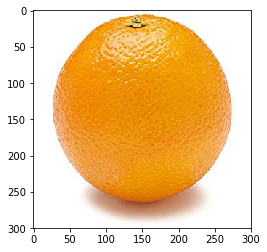

In [98]:
plt.imshow(im_rgb)

In [99]:
im_gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

In [100]:
im.shape

(300, 300, 3)

In [101]:
im_gray.shape

(300, 300)

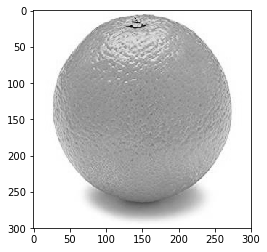

In [103]:
plt.imshow(im_gray,cmap='gray')

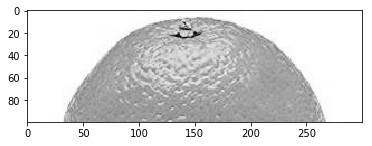

In [104]:
plt.imshow(im_gray[0:100:,],cmap='gray')